<a href="https://colab.research.google.com/github/c00302990/oss2025/blob/main/%EB%8D%B0%EC%9D%B4%ED%84%B0%EB%B6%84%EC%84%9D_%EC%A7%91%EA%B0%92_%EC%98%88%EC%B8%A1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# prompt: /content/sample_data/california_housing_train.csv 데이터로부터 집 값을 예측하는 코드를 작성해줘.

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# 데이터 로드
try:
  df = pd.read_csv('/content/sample_data/california_housing_train.csv')
except FileNotFoundError:
  print("Error: File not found. Please make sure the file path is correct.")
  exit()

# 특성(X)과 타겟 변수(y) 분리
X = df.drop('median_house_value', axis=1)
y = df['median_house_value']

# 데이터를 훈련 세트와 테스트 세트로 분할
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 선형 회귀 모델 생성 및 훈련
model = LinearRegression()
model.fit(X_train, y_train)

# 테스트 세트로 예측
y_pred = model.predict(X_test)

# 모델 평가 (평균 제곱 오차)
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")


## 새로운 데이터 예측

In [2]:
# 예측 결과 출력 (처음 5개)
print("\nPredictions:")
for i in range(5):
    print(f"Actual: {y_test.iloc[i]}, Predicted: {y_pred[i]}")



Predictions:
Actual: 142700.0, Predicted: 143770.3950296347
Actual: 500001.0, Predicted: 398615.57056492753
Actual: 61800.0, Predicted: 86341.10306742368
Actual: 162800.0, Predicted: 148534.3535334468
Actual: 90600.0, Predicted: 147202.29808602203


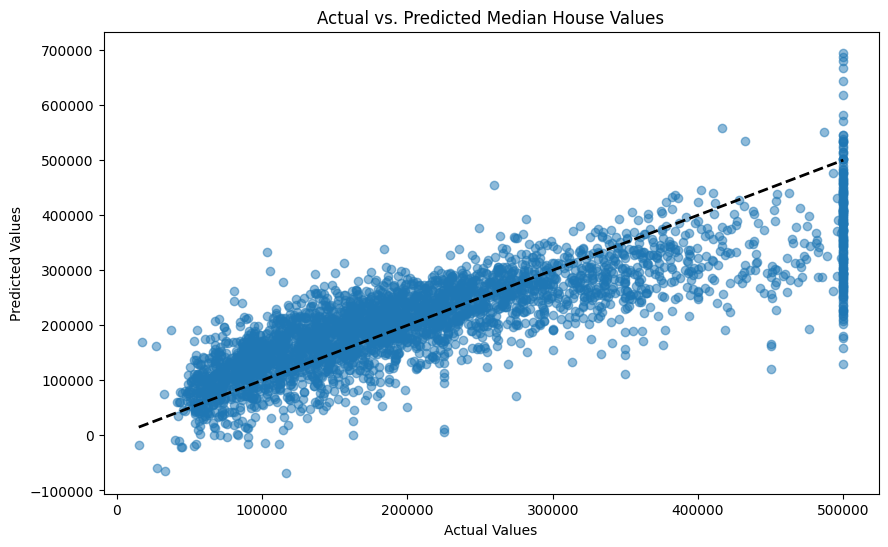

In [3]:
# prompt: 차트도 만들어줘.

import matplotlib.pyplot as plt

# 실제값과 예측값을 시각화
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs. Predicted Median House Values')
plt.show()
